In [1]:
# Cluster and Topic Modeling exploration
# https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/clustering/agglomerative.py

from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [2]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [3]:
tob = pd.read_csv('./tob_v1_classified.csv', index_col='index')

tob.head()

,user,question,answer,question_class
index,,,,
0,100,hi,"Hello, how are you?",Greet
1,100,Simone,"Sorry, I still can't answer that.. Could you a...",Statement
2,100,I am Simone,"Sorry, I still can't answer that.. Could you a...",Statement
3,100,what is software testing,Software testing is an activity of software en...,whQuestion
4,100,what is structural testing,Structural testing (or White-Box testing) is a...,whQuestion


In [4]:
embedings = embedder.encode(tob['question'].values)
embedings

array([[-0.09047621,  0.04043951,  0.02390565, ...,  0.06815033,
         0.01786564,  0.01127624],
       [-0.08309873, -0.05995282,  0.01865472, ..., -0.03056173,
        -0.03636412, -0.15343244],
       [-0.0301082 , -0.04681812,  0.07195323, ..., -0.01680329,
        -0.05603677, -0.19724695],
       ...,
       [-0.05213147,  0.0100825 , -0.09586444, ...,  0.02771363,
        -0.02413044, -0.10155365],
       [-0.09047618,  0.04043962,  0.02390568, ...,  0.06815036,
         0.01786566,  0.01127624],
       [ 0.01000324, -0.06694851, -0.0234212 , ...,  0.04776508,
        -0.03691382,  0.02372807]], dtype=float32)

In [5]:
# Normalize the embeddings to unit length
embedings = embedings /  np.linalg.norm(embedings, axis=1, keepdims=True)
embedings

array([[-0.09047621,  0.04043951,  0.02390565, ...,  0.06815033,
         0.01786564,  0.01127624],
       [-0.08309874, -0.05995282,  0.01865472, ..., -0.03056173,
        -0.03636412, -0.15343246],
       [-0.0301082 , -0.04681812,  0.07195323, ..., -0.01680329,
        -0.05603677, -0.19724695],
       ...,
       [-0.05213147,  0.01008251, -0.09586444, ...,  0.02771363,
        -0.02413044, -0.10155366],
       [-0.09047618,  0.04043962,  0.02390568, ...,  0.06815036,
         0.01786566,  0.01127624],
       [ 0.01000324, -0.06694851, -0.0234212 , ...,  0.04776508,
        -0.03691382,  0.02372807]], dtype=float32)

In [6]:
# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(embedings)
cluster_assignment = clustering_model.labels_

cluster_assignment

array([196, 235, 235, ...,   7, 196, 144])

In [7]:
tob['question_cluster'] = cluster_assignment

In [8]:
tob.head()

,user,question,answer,question_class,question_cluster
index,,,,,
0,100,hi,"Hello, how are you?",Greet,196
1,100,Simone,"Sorry, I still can't answer that.. Could you a...",Statement,235
2,100,I am Simone,"Sorry, I still can't answer that.. Could you a...",Statement,235
3,100,what is software testing,Software testing is an activity of software en...,whQuestion,118
4,100,what is structural testing,Structural testing (or White-Box testing) is a...,whQuestion,23


In [9]:
tob.value_counts('question_cluster')

question_cluster
255    164
196    107
118     75
199     71
162     69
      ... 
230      2
240      2
246      2
109      2
231      2
Name: count, Length: 267, dtype: int64

In [10]:
tob[tob['question_cluster'] == 196]

,user,question,answer,question_class,question_cluster
index,,,,,
0,100,hi,"Hello, how are you?",Greet,196
27,100,Hi,"Hello, ask me a question!",Greet,196
31,101,hi,"Hi there, what do you need?",Greet,196
45,102,Hi,Welcome!,Greet,196
47,103,hi,Welcome!,Greet,196
...,...,...,...,...,...
2675,91,Hi,I don't know how to respond this,Greet,196
2678,92,Hi,I don't know how to respond this,Greet,196
2697,93,hi,Hi there,Greet,196


In [11]:
tob12 = pd.read_csv('./tob_v1_x_v2.csv', index_col='index')
tob12

,user,question,question_class,answer_v1,answer_v2,v1_x_v2
index,,,,,,
0,100,hi,Greet,"Hello, how are you?",Hi,0.618338
1,100,Simone,Statement,"Sorry, I still can't answer that.. Could you a...",Hi,0.117703
2,100,I am Simone,Statement,"Sorry, I still can't answer that.. Could you a...","Sorry, I didn't understand your question, coul...",0.575173
3,100,what is software testing,whQuestion,Software testing is an activity of software en...,Software testing is an activity of software en...,0.998822
4,100,what is structural testing,whQuestion,Structural testing (or White-Box testing) is a...,Structural testing (or White-Box testing) is a...,1.000000
...,...,...,...,...,...,...
2984,98,what is the definition of state transition tes...,whQuestion,"It is a criteria within functional testing, bu...",I don't understand what you mean,0.136184
2985,98,what is graph testing,whQuestion,Software testing is an activity of software en...,I don't understand what you mean,-0.001124
2986,98,what is graph matrix testing,whQuestion,"It is a criteria within functional testing, bu...",Software testing is an activity of software en...,0.409774


In [12]:
tob12 = tob12.join(tob['question_cluster'], on='index', how='inner')

tob12 = tob12[["user", "question", "question_class", "question_cluster", "answer_v1", "answer_v2", "v1_x_v2"]]
tob12 = tob12.rename({"v1_x_v2": "v1_v2_similarity"})

In [13]:
tob12.to_csv('./tob_question_cluster.csv')

<Axes: ylabel='Frequency'>

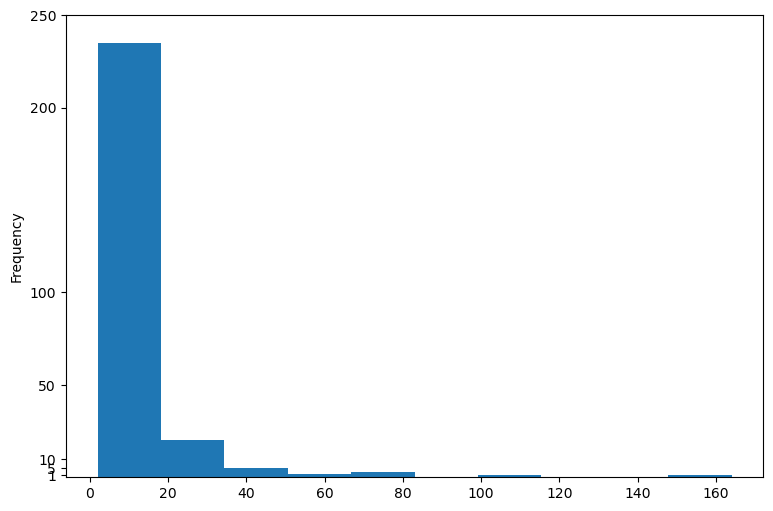

In [35]:
tob12['question_cluster'].value_counts().plot(kind='hist', figsize=(9,6), yticks=[1, 5, 10, 50, 100, 200, 250])